# Python. Итоговая работа

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой

## Задания итоговой работы:

### Задачи:

1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

   ● Доля сотрудников с повышением за последние 5 лет
   
   ● Средняя степень удовлетворенности
   
   ● Среднее количество проектов
   
   
9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решение на github и прислать ссылку

#### Описание датасета 
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department- отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
 

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 15,7

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
df = pd.read_csv('DATA/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# проверяем в процентах количество пропущенных значений
for col in df.columns:
    percent_missing = df[col].isnull().mean()
    print(f'{col} - {percent_missing :.1%}')

#получаем основные описательные статистики по колонкам   
df.describe()

satisfaction_level - 0.0%
last_evaluation - 0.0%
number_project - 0.0%
average_montly_hours - 0.0%
time_spend_company - 0.0%
Work_accident - 0.0%
left - 0.0%
promotion_last_5years - 0.0%
department - 0.0%
salary - 0.0%


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# получаем моду каждой колонки
for col in df.columns:
    mode = df[col].mode()[0]
    print(f'{col} - Mode: {mode}')

satisfaction_level - Mode: 0.1
last_evaluation - Mode: 0.55
number_project - Mode: 4
average_montly_hours - Mode: 135
time_spend_company - Mode: 3
Work_accident - Mode: 0
left - Mode: 0
promotion_last_5years - Mode: 0
department - Mode: sales
salary - Mode: low


In [6]:
# получаем список уникальных значений для категориальных данных
for col in df.columns:
    if df.dtypes[col] == 'object':
        print(f'{col} -- {df[col].unique()}')

department -- ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary -- ['low' 'medium' 'high']


### Строим корреляционную матрицу

In [7]:
dff = df[['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company']].copy()
dff.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


<AxesSubplot:>

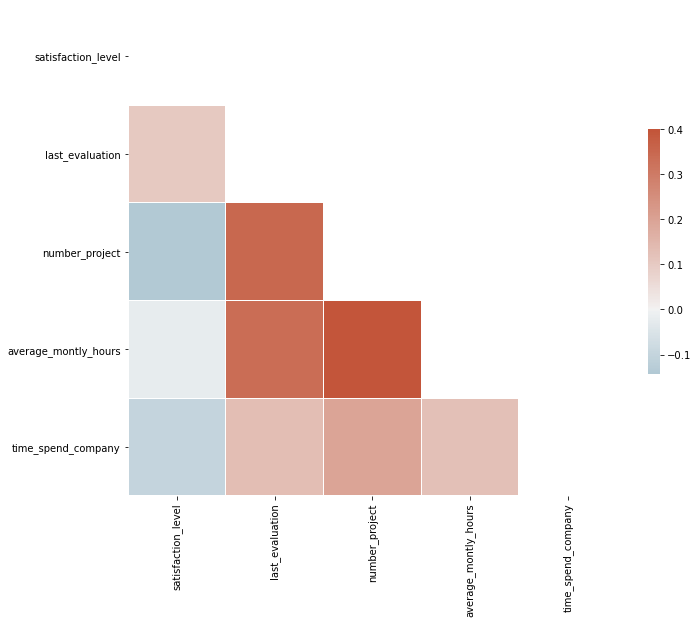

In [8]:
# Вычисляем корреляционную матрицу
corr = dff.corr()

# Задаем маску
mask = np.triu(np.ones_like(corr, dtype=bool))

# сабплот + colormap
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Рисуем матрицу корреляции
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


### Выводы: 

Самые наиболее скоррелированные - это количество проектов и среднее количество рабочих часов в месяц, проведенных на работе. А также количество проектов и время, которое прошло с последней оценки.

Самые наименее скоррелированные - это уровень удовлетворенности и среднее количество рабочих часов в месяц, а тот же уровень и стаж работы в компании.

### Расчет количества сотрудников по отделам

In [10]:
dep_emp = df[['department']].value_counts()
dep_emp

department 
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

### Показать распределение сотрудников по зарплатам.

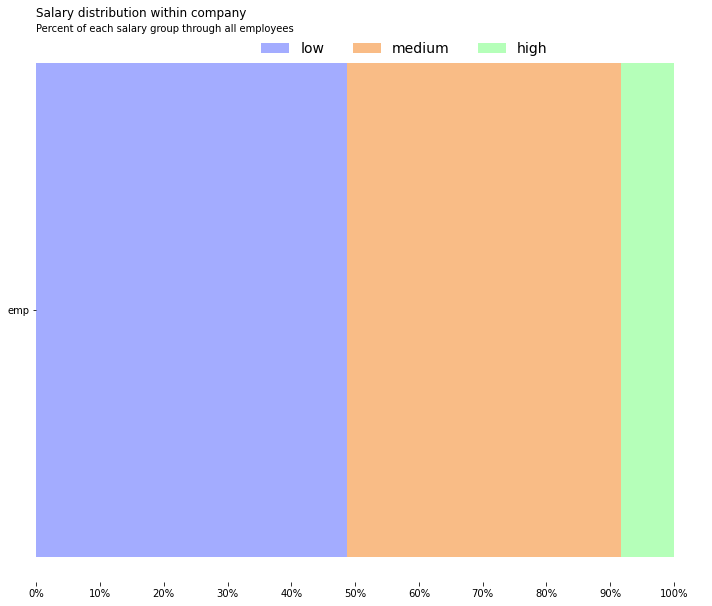

In [11]:
# подготовим данные

df_5 = df[['salary']].value_counts().reset_index()
df_5.columns = ['salary_group','emp']
total = df_5['emp'].sum()
df_5 = df_5.T
df_5 = df_5.rename(columns=df_5.iloc[0])
df_5 = df_5[1:]
df_5 = df_5.div(total)

# переменные
labels = ['low', 'medium', 'high']
colors = ['#a3acff', '#f9bc86', '#b5ffb9']
title = 'Salary distribution within company \n'
subtitle = 'Percent of each salary group through all employees'

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df_5.columns.tolist()
    fig, ax = plt.subplots(1, figsize=(12, 10))
    
    # строим графики

    bheight = 0.8
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx], height = bheight)
        left = left + df[name]
        
    # заголовок и подзаголовок
    
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.45, subtitle)
    
    # легенда
    
    plt.legend(labels, loc = 'center', bbox_to_anchor=([0.55, 0.98, 0, 0]), ncol=4, frameon=False, fontsize = 14)
    
    # убираем spines
    
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # формат оси Х
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)

    plt.show()
    
plot_stackedbar_p(df_5, labels, colors, title, subtitle)

### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
# подготавливаем данные

df_6raw = df[['department','salary','number_project']].copy()
df_6 = pd.pivot_table(df_6raw, index='department',columns='salary',aggfunc='count').fillna(0).astype(int).reset_index().droplevel(0, axis=1).sort_values(by='low', ascending = False)
df_6.columns = ['dep', 'high', 'low', 'medium']
df_6

,dep,high,low,medium
7,sales,269,2099,1772
9,technical,201,1372,1147
8,support,141,1146,942
0,IT,83,609,535
6,product_mng,68,451,383
5,marketing,80,402,376
1,RandD,51,364,372
2,accounting,74,358,335
3,hr,45,335,359
4,management,225,180,225


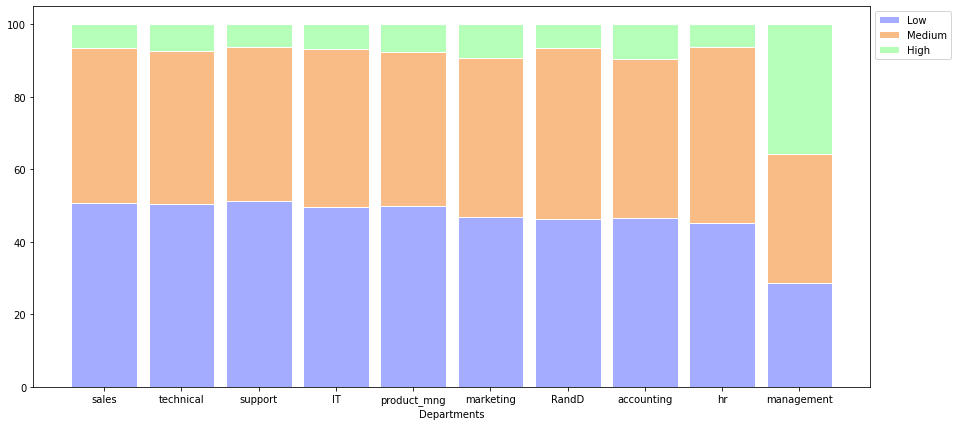

In [13]:
# Расчет данных для построения
totals = [i+j+k for i,j,k in zip(df_6['high'], df_6['medium'], df_6['low'])]
greenBars = [i / j * 100 for i,j in zip(df_6['high'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_6['medium'], totals)]
blueBars = [i / j * 100 for i,j in zip(df_6['low'], totals)]
 
# Необходимые данные для построения
r = [i for i in range(len(df_6['dep']))] 
barWidth = 0.85
names = df_6['dep'].tolist()

# Собираем Bar plot 
plt.bar(r, blueBars, color='#a3acff', edgecolor='white', width=barWidth, label="Low")
plt.bar(r, orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Medium")
plt.bar(r, greenBars, bottom=[i+j for i,j in zip(blueBars, orangeBars)], color='#b5ffb9', edgecolor='white', width=barWidth, label="High")
 
# Ось X
plt.xticks(r, names)
plt.xlabel("Departments")
 
# Легенда
plt.legend(loc='best', bbox_to_anchor=(1,1), ncol=1)
 
plt.show()


### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [39]:
import scipy.stats as stats 
from scipy.stats import f_oneway
from scipy.stats import shapiro

# Подготавливаем данные

df_7raw = df[['salary','average_montly_hours']].copy()

low = df_7raw[df_7raw['salary'] == 'low']['average_montly_hours'].to_list()
mid = df_7raw[df_7raw['salary'] == 'medium']['average_montly_hours'].to_list()
high = df_7raw[df_7raw['salary'] == 'high']['average_montly_hours'].to_list()


0.4583624407867663 0.6323271153144614
Нет веских оснований для отклонения H0


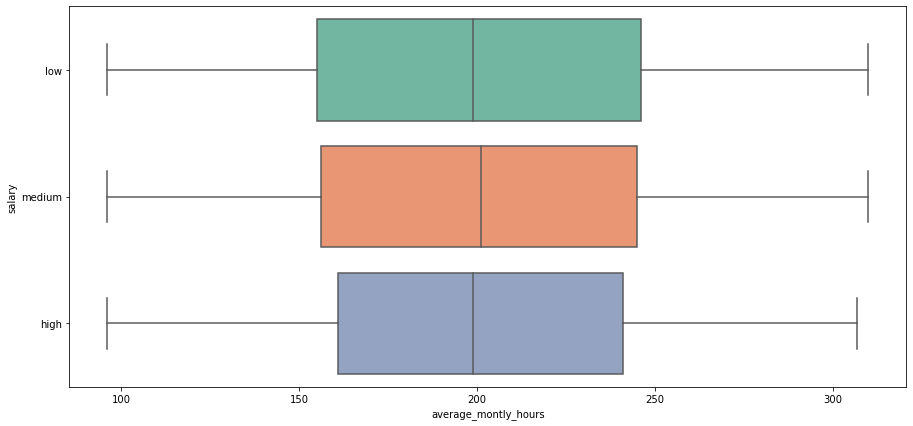

In [45]:
# для оценки будем использовать Oneway ANOVA

F, p = stats.f_oneway(low, mid, high)

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Нет веских оснований для отклонения H0')
else:
    print('Есть статистическая возможность отклонить H0, принимаем H1')

ax = sns.boxplot(x=df_7raw['average_montly_hours'],y=df_7raw['salary'], data=df_7raw, orient = 'h', palette="Set2")

### Выводы: 

Гипотеза не подтверждена. Скорее всего имеет место быть увеличение нагрузки в связи с более высокооплачиваемой должностью, однако такие специалисты/руководители обычно выполняют работу более эффективно => существенная разница в среднемесячном рабочем времени не появляется.

### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
   ● Доля сотрудников с повышением за последние 5 лет
   ● Средняя степень удовлетворенности
   ● Среднее количество проектов

In [73]:
# подготавливаем данные для создания сводной таблицы

df_8raw = df[['left','promotion_last_5years','satisfaction_level','number_project']].copy()
df_8raw.replace({'left': {0: 'Работает', 1: 'Уволился'}}, inplace = True)

df8 = df_8raw.groupby('left').agg(
                            {'satisfaction_level':np.mean,
                             'number_project':np.mean,
                             'promotion_last_5years': lambda x: x.sum() / len(x) * 100})
df8

,satisfaction_level,number_project,promotion_last_5years
left,,,
Работает,0.666810,3.786664,2.625131
Уволился,0.440098,3.855503,0.532064


### Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [88]:
# подготавливаем данные 
df9 = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].copy()
result = df.left.to_list()

In [89]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df9, result, test_size=0.25)

In [90]:
lda = LinearDiscriminantAnalysis()

In [91]:
# обучаем данные
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [98]:
# проверим точность нашей модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.748

### Для простейшего LDA - точность получилась не самая плохая.